# Logistic regression
Logistic regression is a statistical model which defines the probability of a class to be assigned to a binary result (most of the times 0/1).

This logic can be encapsulated many times, being able to define as much outputs as elements to describe. That means, if it's necessary to classify animals into three diferent classes, it's not necessary to get an output with 3 diferent values, could be achieved by providing 3 outputs with a 0/1 value where each output means one of the possible classes.

Logistic regression is described by a logistic equation described by ln(p/[1-p]).

Despite it's commonly used in health secfor for predicting mortality in injured patients, it's also used for predicting values such as diseases, or even in the marketing field. Another popular usage of this functions is in **neural networks** as activation function for neurons. Neurons get information and logistic is one of the possible functions to trigger the 0/1 output to the following layer.

For this practice, the algorithm will be implemented in a biomedical dataset focused in patients with cardiovascular diseases, described by several attributes. Using this attributes and the algorithm, the objective is to predict wheter or not a person is susceptible of suffering a cardiovascular disease.

# Cardiovascular dataset
In this practice, the data is in a document called *cardio_train*.
This dataset contains a register of 70000 patients characterized by 12 attributes:
- Age
- Heigh
- Weight
- Gender
- Systolic blood pressure: Measuring blood pressure when ventricles are contracted.
- Diastolic blood pressure: Measuring blood pressure when ventricles are relaxed.
- Cholesterol
- Glucose
- Smoking
- Alcohol intake
- Physical activity
- Presense or absense of cardiovascular disease

Most of the attributes are described with binary values (0/1) such as smoking, alcohol intake, physical activity and the objective attribute **presence or absense of cardiovascular disease**. 

The remaining attributes contain data in numeric format (integers/doubles) within a range for each domain.

In order to start to evaluate, the process will be splitted in several blocks:
- Load the data.
- First cleanse: Delete those attributes/instances with wrong/irrelevant data.
- Analyze: Analysis of the dataset, including first step methodologies involving variance, correlation...
- Modelling: Select the algorithm (logaritmic regression), furthermore, tune it up with hyperparameters in order to optimize the regression.
- Testing and validation: Test the data with methods such as cross validation / train test split.
- Predict: Try new values in order to reevaluate the results.

## Loading the data
As mentioned before, the data is stored in a local folder as a .csv document. Importing the data is simple with the function *read.csv()*

In [22]:
# Path for the document
data_path <- "cardio_train.csv"

# Open the document, using the header and separator
cardio_df <- read.csv(data_path, header=TRUE, sep=";")

head(cardio_df)

cat(sprintf("Dataset dimensions: %i,%i", dim(cardio_df)[1], dim(cardio_df)[2]))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,1,151,67,120,80,2,2,0,0,0,0


Dataset dimensions: 70000,13

Loading the dataset is really simple. In the cell above, the first 6 rows from the dataset are displayed and the first values of each attribute are readable. 

It's curious how the age of the patients are displayed in days (as integer values), same as height, weight, and both measures about blood pressure. Also notice gender is a binary attribute but in this case the values are 1/2 instead the 0/1 values used for some attributes such as smoke, alcohol, active exercise and the objective attribute **cardio** which is the patients with cardiopaties.

## First cleanse
In order to analyze properly the dataset, it's necessary to clean the data first. Following steps consist in ensure all values are correct (that means avoiding **null**) and check for extreme **outliers**.

In [23]:
# Summarize the attributes
summary(cardio_df)

# Check null values 
cat(sprintf("Null values in the dataset: %i", sum(is.na(cardio_df))))

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

Null values in the dataset: 0

#### Results
The dataset is completely clean, meaning there's no **null** values. Moreover, that does not mean all the values are fine, but at least everything will 'compile' in case of avoid cleaning.

## Analysis
This summarize gives some information about how the data is distributed. At first sight, id is irrelevant and some attributes have extreme values despite our field knowledge is limited:
- age: Youngest patient is arround 30 years, mean age is close to 53 years and the oldest patient is arround 65 years, meaning there's more middle age patients than younger ones.
- gender: Despite it's a binary attribute, gives information about the proportion. If patients were equally distributed,  mean value would be 1.5, meaning there's way more patients from the gender 1 than gender 2.
- heigh: Extreme values (min and max) look like both of them are wrong unless the pattients evaluated in this study have somatotropin disiease (gigantic) or dwarfism (due to the age range). Would be necessary to check how many measures are rounding both extremes to understand if it's an excepcion, hence, is not descriptive of the sample. 
- weight: Also extreme values are suspicious, specially the minimum (10). Despite ignore the measure, considering mean and quartiles makes sense to consider kilograms, therefore the minimum value makes no sense. It's necessary to review if belongs to the minimum heigh and conclude if it'll be maintained or not.
- blood pressures: For this measure, a normal value is like 120/80 (systolic, diastolic) so compared with the measures taken, it's feasible to have values arround interquartile range (remember this are patients suffering from disease) but extreme values such as negative blood pressure or having 16000 as blood pressure it's a nonsense. This values should get deleted without any doubt.
- cholesterol: Looks like there's 3 different levels/types of cholesteral (1/2/3) and most of the patients shall be at level 1 since mean is quite close to it (healthy cholesterol level)
- glucose: same principle as cholesterol, but the proportion is even more displaced to level 1, mean is closer to it.
- smoke/alcohol: Both attributes are binary (0/1) and mean value in both is fairly close to 0, meaning most of the patients are healthy in this aspect.
- active: Inversely to smoke and alcohol, active attribute is higher (0.8 mean) which means most of the patients practice sport regularly.
- cardio: Finally the **objective** attribute is also binary (0/1). In this case mean is overall 50%, meaning there's a balance for each class, helping the model to avoid biases.

This first analysis helped us out to understand the loaded data. The following step consists in consider this 'special cases' and evaluate how to proceed with them.

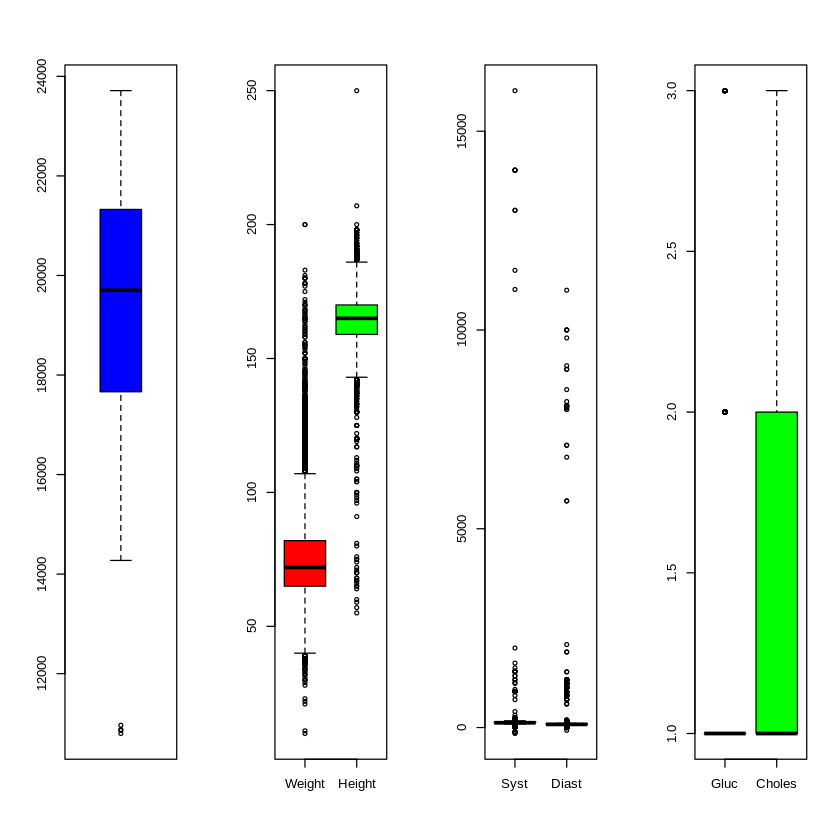

In [24]:
# Visualize boxplots for all those measures with non binary values, grouped by attributes with similar ranges

par(mfrow=c(1,4))

# Age distribution
boxplot(cardio_df$age, col=c("blue"),names=c("Age"))

# Height and weight
boxplot(cardio_df$weight, cardio_df$height, col=c("red","green"),
       names=c("Weight","Height"))

# Blood pressure
boxplot(cardio_df$ap_hi, cardio_df$ap_lo, col=c("red","green"),
       names=c("Syst","Diast"))

# Glucose and cholesterol
boxplot(cardio_df$gluc, cardio_df$cholesterol, col=c("red","green"),
       names=c("Gluc","Choles"))

#### Boxplot conclusion
Based on this first visualization technique, some data cleanse coud be applied combined with the statistic summary.

To begin with, age attribute might be correct, assuming the vast majority of patients with cardiological diseases might be on middle-old population and that small quantity of patients arround 30 years could be assumed as hereditary diseases. This few measures could be (or not) cleansed.

On the other hand, the 4rth boxplot which contains *glucose* and *cholesterol* is displaying a quite curious boxplot. In glucose, just a bar at value 1 is drawed (meaning interquartile range is at that same value) and displaying points at values 2 and 3, which means there's a few patients with that glucose values, but it's assumable.

Same happens with cholesterol, the majority of the patients must have values between 1 and 2. For both attributes would be necessary to visualize the data using the **histogram** technique, displaying way better the distribution for those attributes with few possible values.

The task of this boxplot is to find out nonsense data, which is found on the remaining boxplots, 2nd and 3rd ones.

**2nd boxplot: weight & height**
Despite human beings have a wide range for this two characteristics, makes no sense most of the mesures outside the boxplot generated.

Considering age range of the patients (over 30 years), having patents with weight under 50kg it's absurde unless some of them are suffering another disease (anorexy). Same happens on the other side, where having so many patients overweighted it's quite uncommon. 

In height boxplot something similar happens, while is feasible to have some high patients (considering high something like 2 meters height) the outlier located at 2.5 meters must be a wrong measure since it's the measure of the tallest man in the world (actually). On the oposit side, having patients arround centimeters tall it's possible (smallest man in the world measure arround that) it's quite uncommon to have that many patients in that height.

For this reason, both measures will be bounded to values more common since this extreme ones are not representative of the sample.

**3rd boxplot: Blood pressure**
Normal blood pressure is arround 120/80 (ap_hi/ap_lo), matching with mean values for this attributes. Assuming there's a wide range for those ill patients, over 180/120 can cause damage to blood vessels. Same occurs on the other side, less than 90/60 (hypotension) can cause fainting.

Due to this measures, some considerations must be done, since the dataset contains even negative values (which is absurde) and nonsense measures over 200, having over 15000 as blood pressure (which is unreal).

This measures will be bounded in order to reduce the amount of noisy data and get a representative and logic dataset.

In [25]:
# Bounding age
cardio_df <- cardio_df[cardio_df$age >= 14000,]

# Bounding based on boxplot outliers defining lower bound with a wider ranger considering the 
# nature of the dataset focused on illness
# ap_hi
iq_rang <- fivenum(cardio_df$ap_hi)[4] - fivenum(cardio_df$ap_hi)[2]
lower_bound <- fivenum(cardio_df$ap_hi)[2] - (iq_rang*2)
upper_bound <- fivenum(cardio_df$ap_hi)[2] + (iq_rang*2)

cardio_df <- cardio_df[cardio_df$ap_hi >= lower_bound,]
cardio_df <- cardio_df[cardio_df$ap_hi <= upper_bound,]

# ap_lo
iq_rang <- fivenum(cardio_df$ap_lo)[4] - fivenum(cardio_df$ap_lo)[2]
lower_bound <- fivenum(cardio_df$ap_lo)[2] - (iq_rang*2)
upper_bound <- fivenum(cardio_df$ap_lo)[2] + (iq_rang*2)

cardio_df <- cardio_df[cardio_df$ap_lo >= lower_bound,]
cardio_df <- cardio_df[cardio_df$ap_lo <= upper_bound,]

# heigh
iq_rang <- fivenum(cardio_df$heigh)[4] - fivenum(cardio_df$heigh)[2]
lower_bound <- fivenum(cardio_df$heigh)[2] - (iq_rang*1.5)
# As upper bound, just filter over 2 meters tall
upper_bound <- 200

cardio_df <- cardio_df[cardio_df$heigh >= lower_bound,]
cardio_df <- cardio_df[cardio_df$heigh <= upper_bound,]

# weight
iq_rang <- fivenum(cardio_df$weight)[4] - fivenum(cardio_df$weight)[2]
lower_bound <- fivenum(cardio_df$weight)[2] - (iq_rang*1.5)
upper_bound <- fivenum(cardio_df$weight)[2] + (iq_rang*2)

cardio_df <- cardio_df[cardio_df$weight >= lower_bound,]
cardio_df <- cardio_df[cardio_df$weight <= upper_bound,]


cat(sprintf("Dataset dimensions: %i,%i", dim(cardio_df)[1], dim(cardio_df)[2]))
summary(cardio_df)

Dataset dimensions: 62958,13

       id             age            gender          height          weight  
 Min.   :    0   Min.   :14282   Min.   :1.000   Min.   :143.0   Min.   :40  
 1st Qu.:24961   1st Qu.:17630   1st Qu.:1.000   1st Qu.:159.0   1st Qu.:64  
 Median :50053   Median :19689   Median :1.000   Median :165.0   Median :71  
 Mean   :49984   Mean   :19440   Mean   :1.342   Mean   :164.3   Mean   :72  
 3rd Qu.:74888   3rd Qu.:21306   3rd Qu.:2.000   3rd Qu.:169.0   3rd Qu.:80  
 Max.   :99999   Max.   :23713   Max.   :2.000   Max.   :198.0   Max.   :99  
     ap_hi           ap_lo         cholesterol         gluc      
 Min.   : 80.0   Min.   : 60.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:120.0   1st Qu.: 80.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :120.0   Median : 80.00   Median :1.000   Median :1.000  
 Mean   :124.9   Mean   : 80.57   Mean   :1.343   Mean   :1.213  
 3rd Qu.:130.0   3rd Qu.: 90.00   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :160.0   Max.   :100.00   Max.   :3.000   Max.   :

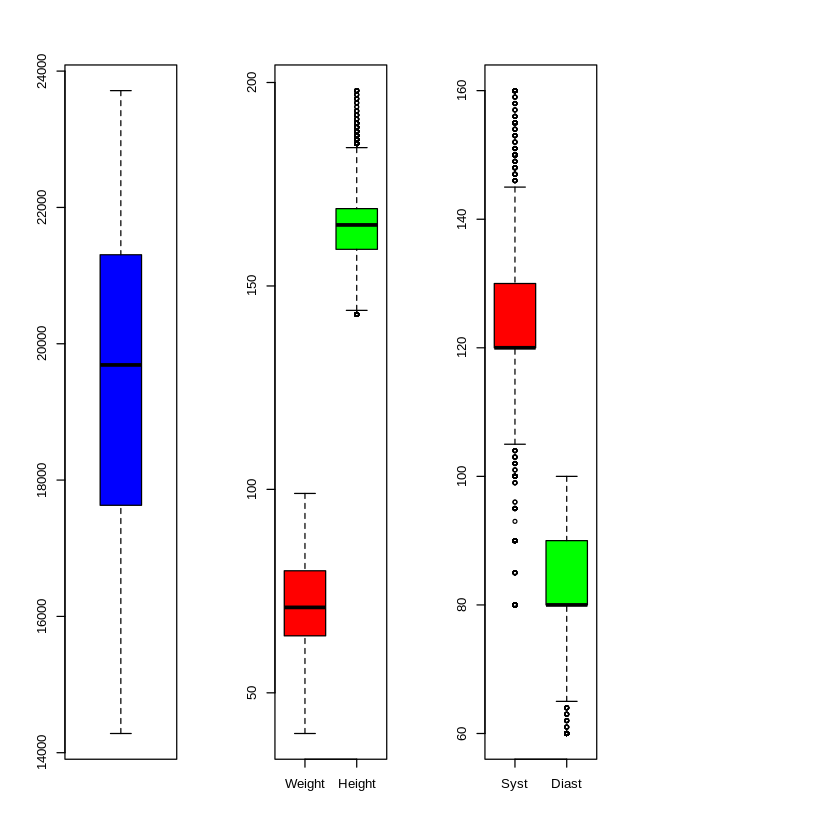

In [26]:
# Final boxplots with clean data
par(mfrow=c(1,4))

# Age distribution
boxplot(cardio_df$age, col=c("blue"),names=c("Age"))

# Height and weight
boxplot(cardio_df$weight, cardio_df$height, col=c("red","green"),
       names=c("Weight","Height"))

# Blood pressure
boxplot(cardio_df$ap_hi, cardio_df$ap_lo, col=c("red","green"),
       names=c("Syst","Diast"))

### Results
This final measures are not abnormal to consider as data recovered from patients, despite blood pressure has many *outliers* could be reasonable values for critical patients. Notice *cardio* attribute is now 47% - 53% which means most of the records deleted were classified as ill patients. Nevertheless, this patients were handling absurd data adding noise, so having this new distribution with a small unbalance but with representative data is worthy.

The following steps involve selecting the model, which in this case is defined by the problem (logaritmic regression) and build it up. Nevertheless, do some more analysis is recommended in order to improve the model. 

## Second phase analysis

This second phase analysis firstly consists in check out if the people involved in this experiment really belongs to different classes using the **hypothesis test**.

Once is demonstrated, the analysis will try to find out which attributes describe better the objective attribute *cardio* using different methods to ensure the result.

In [27]:
# Split the dataset into two based on the class. Notice it's balanced (47-53)
ill_patients <- cardio_df[cardio_df$cardio == 1,]
health_patients <- cardio_df[cardio_df$cardio == 0,]

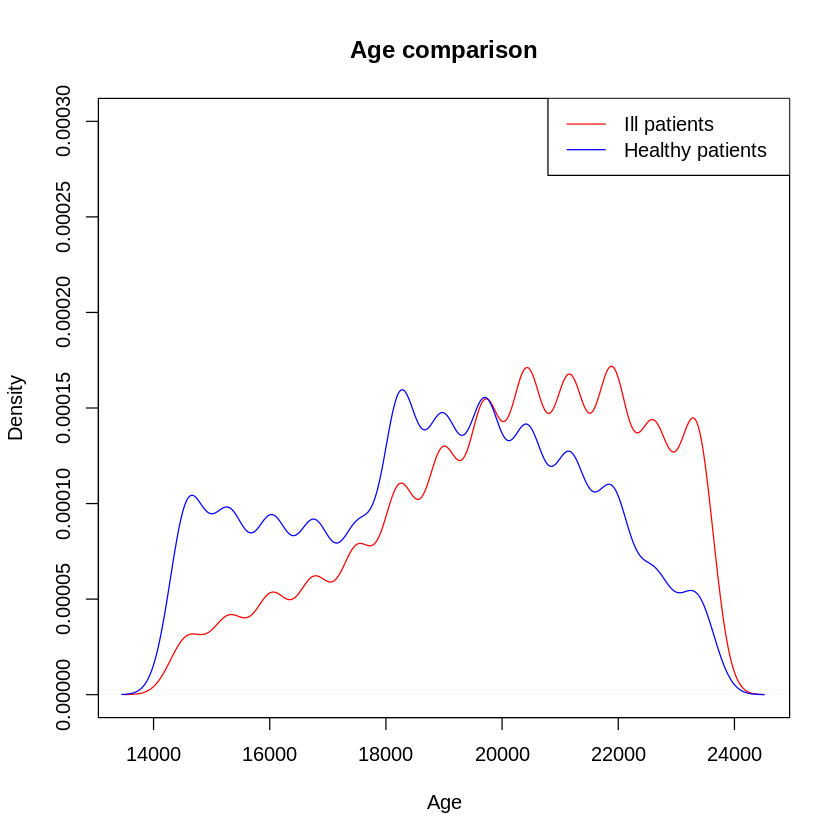

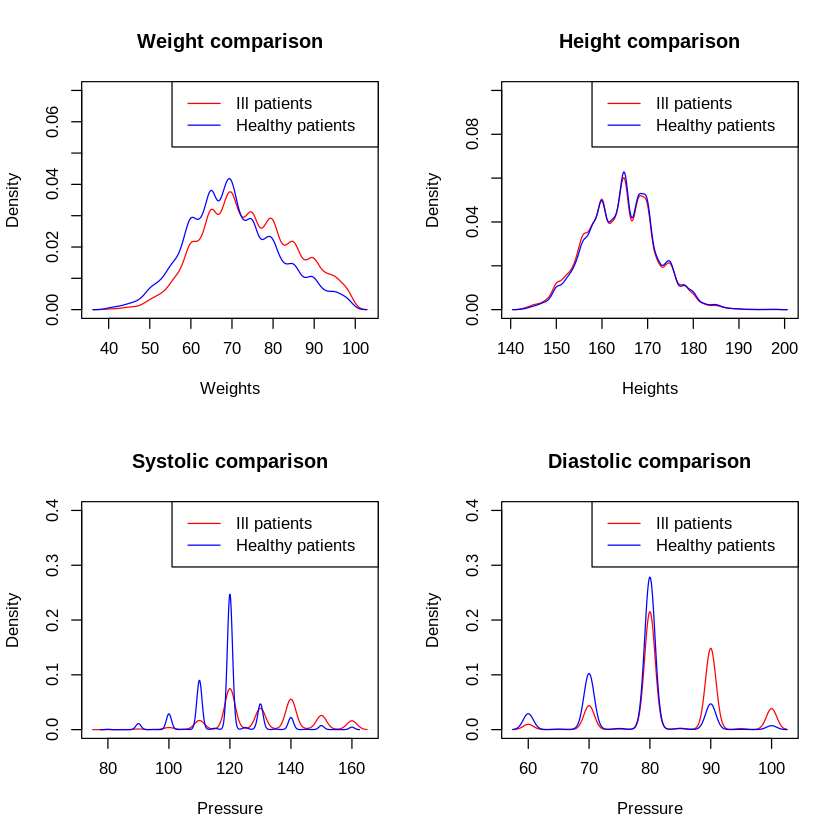

In [28]:
# First method: visualize histogram / density plot

# Age
plot(density(ill_patients$age), col = 'red', main = "Age comparison", 
    xlab = "Age", ylab = "Density", ylim = c(0,0.0003))
lines(density(health_patients$age), col = 'blue')
# Legends
legend("topright", c("Ill patients", "Healthy patients"), col = c("red", "blue"),lty=1:1)

par(mfrow=c(2,2))

# Weights
plot(density(ill_patients$weight), col = 'red', main = "Weight comparison", 
    xlab = "Weights", ylab = "Density", ylim = c(0,0.07))
lines(density(health_patients$weight), col = 'blue')
# Legends
legend("topright", c("Ill patients", "Healthy patients"), col = c("red", "blue"),lty=1:1)

# Heights
plot(density(ill_patients$height), col = 'red', main = "Height comparison", 
    xlab = "Heights", ylab = "Density", ylim = c(0,0.1))
lines(density(health_patients$height), col = 'blue')
# Legends
legend("topright", c("Ill patients", "Healthy patients"), col = c("red", "blue"),lty=1:1)

# Systolic blood pressure
plot(density(ill_patients$ap_hi), col = 'red', main = "Systolic comparison", 
    xlab = "Pressure", ylab = "Density", ylim = c(0,0.4))
lines(density(health_patients$ap_hi), col = 'blue')
# Legends
legend("topright", c("Ill patients", "Healthy patients"), col = c("red", "blue"),lty=1:1)

# Diastolic blood pressure
plot(density(ill_patients$ap_lo), col = 'red', main = "Diastolic comparison", 
    xlab = "Pressure", ylab = "Density", ylim = c(0,0.4))
lines(density(health_patients$ap_lo), col = 'blue')
# Legends
legend("topright", c("Ill patients", "Healthy patients"), col = c("red", "blue"),lty=1:1)

After visualize distributions, some information come to light:
- Age: Quite clear, older patients are used to get more cardiovascular diseases.
- Weight: Not as clear as age, but the dataset with ill patients tend to weight more.
- Height: Height is not determinant on having cardiovascular diseases, both distributions are barely the same.
- Blood pressure: It's clear how healty patients tend to have blood pressure rounding the normal values, and the ill patients to have it higher.

This analysis is only applied to numerical attributes rather than binary ones which only gives information about proportion.

After visualizing this graphics it's clear: ill patients (1) and healthy patients (0) are different classes. Despite this clarity, calculating *Z score* could ensure this result.

In [29]:
# Median calculation
med_ill <- mean(ill_patients$age)
med_health <- mean(health_patients$age)

# Deviations
sd_ill <- sd(ill_patients$age)
sd_health <- sd(health_patients$age)

# Dataset size
n_ill <- dim(ill_patients)[1]
n_health <- dim(health_patients)[1]

Z_inc_num <- med_ill - med_health
Z_inc_den <- sqrt((sd_health*sd_health)/n_health + (sd_ill*sd_ill)/n_ill)

Z <- Z_inc_num / Z_inc_den
cat(sprintf("Z: %f", Z))
cat(sprintf("\nMeans %f Obtained in Gaussian distribution for age", round(pnorm(Z)*100,4)))

Z: 63.525189
Means 100.000000 Obtained in Gaussian distribution for age

Despite using *age* is quite obvious, *height* gives poor values on Z and Gaussian distribution. This means the attribute is the same for both classes (ill patients / healthy patients) and will have less potential for being used into the model for classify the records. The rest of the attributes evaluated will probably be the ones involved in characterize the patients maybe with some of the binary attributes left for this analysis.


### Attributes selection
In order to select attributes for building the model, it's necessary to understand the amount of information that each of them adds to the dataset. For this purpose, **PCA** and **correlation matrix** will be the selected techniques.

In [30]:
# Pop ID field since gives no information at all and is a nonsense unless the analysis involves time evolution
# assuming ID is assigned at hospitalization
cardio_df2 <- subset(cardio_df, select = -id)

# Build PCA
PCA_cardio <- princomp(cardio_df2, scores = T)

# Visualize statistical results
summary(PCA_cardio)

Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     2470.4175462 1.593261e+01 1.114230e+01 6.867967e+00
Proportion of Variance    0.9999254 4.159115e-05 2.034121e-05 7.728288e-06
Cumulative Proportion     0.9999254 9.999670e-01 9.999873e-01 9.999950e-01
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     5.376534e+00 7.266386e-01 4.562843e-01 4.298819e-01
Proportion of Variance 4.736218e-06 8.650950e-08 3.411127e-08 3.027786e-08
Cumulative Proportion  9.999998e-01 9.999999e-01 9.999999e-01 9.999999e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     4.200105e-01 3.932273e-01 2.697775e-01 1.926862e-01
Proportion of Variance 2.890328e-08 2.533461e-08 1.192445e-08 6.083143e-09
Cumulative Proportion  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00

Having a look into this results, it's obvious something needs to be done. Despite giving the astonishing variance of 99.99%, *age* has also a huge standard deviation which cannot be ignored. Having this deviation is a nonsense for modelling since it's a very wide range for values.

In order to proceed, the age attribute will be popped. Although it might be an important attribute to consider related to any disease, this results are unacceptable.

In [31]:
# Pop age 
cardio_df2 <- subset(cardio_df2, select = -age)
# Build PCA
PCA_cardio <- princomp(cardio_df2, scores = T)

# Visualize statistical results
summary(PCA_cardio)

Importance of components:
                           Comp.1     Comp.2    Comp.3     Comp.4      Comp.5
Standard deviation     16.3053759 11.1621263 6.8994903 5.37862570 0.732165106
Proportion of Variance  0.5676452  0.2660169 0.1016364 0.06176721 0.001144546
Cumulative Proportion   0.5676452  0.8336620 0.9352984 0.99706565 0.998210197
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.4589266941 0.4310628423 0.4208497729 0.3933222426
Proportion of Variance 0.0004496783 0.0003967313 0.0003781547 0.0003303029
Cumulative Proportion  0.9986598752 0.9990566065 0.9994347612 0.9997650641
                            Comp.10      Comp.11
Standard deviation     0.2700145218 1.926862e-01
Proportion of Variance 0.0001556645 7.927141e-05
Cumulative Proportion  0.9999207286 1.000000e+00

This results are way more comprehensive and logic in order to build a model.


Loadings:
            Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
gender                                                 0.427  0.825  0.113
height              0.356  0.932                                          
weight       0.318  0.880 -0.353                                          
ap_hi        0.846 -0.291         0.444                                   
ap_lo        0.425 -0.120        -0.896                                   
cholesterol                             -0.810 -0.323  0.430 -0.211       
gluc                                    -0.573  0.612 -0.482  0.237       
smoke                                                  0.182  0.261       
alco                                                          0.108       
active                                                 0.266        -0.960
cardio                                  -0.124 -0.714 -0.537  0.370 -0.220
            Comp.10 Comp.11
gender       0.344         
height                     
weigh

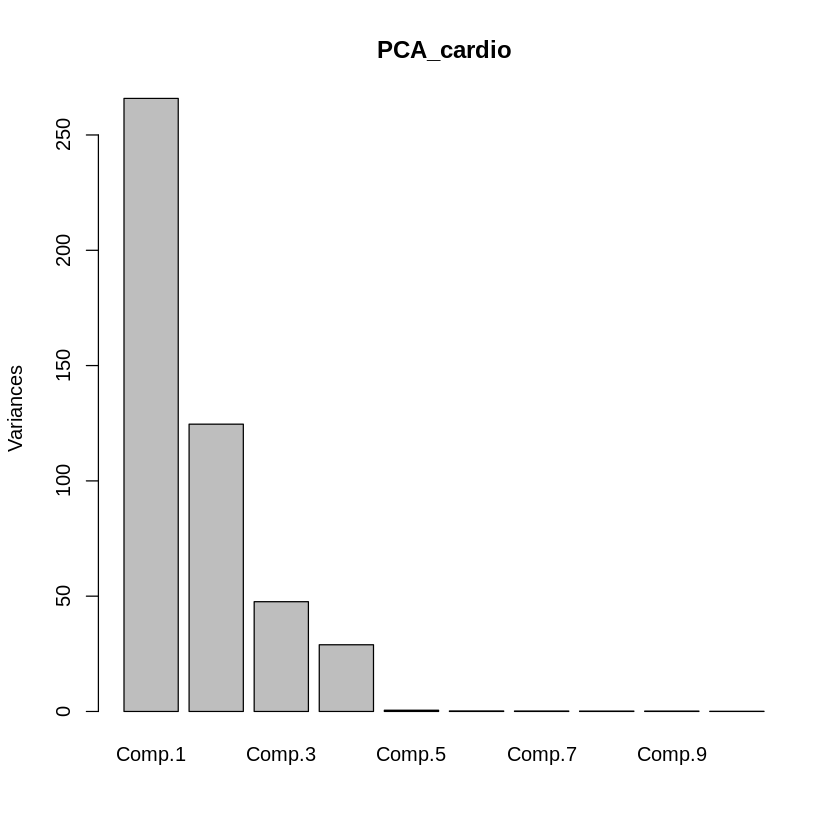

In [32]:
# Get the loads from each attribute for each component
PCA_cardio$loadings

# Visualize graphically each component variance aportation
plot(PCA_cardio)

#### PCA results
After erasing some attributes (id, age) which only caused noise to the data, **PCA** looks way better now. The first 4 components give 99.7% of the variance, which is fairly good and is described with few attributes (weight, height and blood pressure).

### Correlation matrix


In [33]:
# Building correlation matrix
corr_matrix <- cor(cardio_df)

# Values related with the objective attribute
corr_matrix["cardio",]

id           age        gender        height        weight 
 0.0026549780  0.2446840072 -0.0001179741 -0.0232471255  0.1607702177 
        ap_hi         ap_lo   cholesterol          gluc         smoke 
 0.4323795211  0.3320916313  0.2176666370  0.0866956973 -0.0216224599 
         alco        active        cardio 
-0.0153422836 -0.0385451100  1.0000000000

#### Correlation results
For correlation none of the attributes has been deleted. The highest correlated values are:
- age: 24.4%
- weight: 16%
- ap_hi: 43.2%
- ap_lo: 33.2%
- cholesterol_ 21.7%

This attributes are the ones used for the first components but cholesterol, which is used in the 5th component. Nevertheless, age attribute is the most related one, but based on the PCA results, this might be due to the wide rage of ages.

In order to evaluate it, since most of the attributes appear on both methods, the following step will include two different model; first one will use PCA attributes and the second one, all the ones obtained with correlation.

## Logistic regression

In [34]:
# Split the data into train and test
set.seed(123)

# Percentages
fractionTraining   <- 0.80
fractionValidation <- 0.20

# Sample sizes
sampleSizeTraining   <- floor(fractionTraining   * nrow(cardio_df))
sampleSizeValidation <- floor(fractionValidation * nrow(cardio_df))

# Create the randomly-sampled indices for the dataframe. Use setdiff() to
# avoid overlapping subsets of indices.
indicesTraining    <- sort(sample(seq_len(nrow(cardio_df)), size=sampleSizeTraining))
indicesNotTraining <- setdiff(seq_len(nrow(cardio_df)), indicesTraining)
indicesValidation  <- sort(sample(indicesNotTraining, size=sampleSizeValidation))

cardio_training   <- cardio_df[indicesTraining, ]
cardio_validation <- cardio_df[indicesValidation, ]

# model including attributes obtained through correlation
mod_corr <- glm(formula = cardio ~ age + weight + ap_hi + ap_lo + cholesterol
          , data = cardio_training
          , family = binomial)
summary(mod_corr)

# model with few attributes, PCA results
mod_pca <- glm(formula = cardio ~ weight + ap_hi + ap_lo
          , data = cardio_training
          , family = binomial)
summary(mod_pca)


Call:
glm(formula = cardio ~ age + weight + ap_hi + ap_lo + cholesterol, 
    family = binomial, data = cardio_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8049  -0.9185  -0.4463   0.9376   2.6745  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.292e+01  1.509e-01 -85.616  < 2e-16 ***
age          1.459e-04  4.321e-06  33.765  < 2e-16 ***
weight       1.073e-02  9.326e-04  11.508  < 2e-16 ***
ap_hi        6.178e-02  1.152e-03  53.644  < 2e-16 ***
ap_lo        1.076e-02  1.786e-03   6.023 1.72e-09 ***
cholesterol  4.692e-01  1.641e-02  28.595  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69681  on 50365  degrees of freedom
Residual deviance: 56775  on 50360  degrees of freedom
AIC: 56787

Number of Fisher Scoring iterations: 4



Call:
glm(formula = cardio ~ weight + ap_hi + ap_lo, family = binomial, 
    data = cardio_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4133  -0.9785  -0.4894   1.0091   2.7270  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.042e+01  1.273e-01 -81.856  < 2e-16 ***
weight       1.255e-02  9.087e-04  13.814  < 2e-16 ***
ap_hi        6.841e-02  1.137e-03  60.175  < 2e-16 ***
ap_lo        1.092e-02  1.748e-03   6.249 4.14e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69681  on 50365  degrees of freedom
Residual deviance: 59046  on 50362  degrees of freedom
AIC: 59054

Number of Fisher Scoring iterations: 4


Values are fairly good. Now it's time to predict values with the validation dataset and build the confusion matrix.

In [35]:
library(caret)
library(ggplot2)
# Build datasets for validation with only the attributes
val_data_corr <- cardio_validation[, c("age", "weight", "ap_hi", "ap_lo", "cholesterol")]
val_data_pca <- cardio_validation[, c("weight", "ap_hi", "ap_lo")]

# Predict values for both models
predicted_values_corr <- predict(mod_corr, val_data_corr, type = "response")
predicted_values_pca <- predict(mod_pca, val_data_pca, type = "response")

# Values are probabilistic, it's necessary to round them for classes
predicted_values_corr <- ifelse(predicted_values_corr > 0.5, 1, 0)
predicted_values_pca <- ifelse(predicted_values_pca > 0.5, 1, 0)

# Build the confusion matrix for both models
conf_corr <- confusionMatrix(as.factor(predicted_values_corr), as.factor(cardio_validation$cardio))
conf_pca <- confusionMatrix(as.factor(predicted_values_pca), as.factor(cardio_validation$cardio))

In [36]:
conf_corr

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5288 2180
         1 1290 3833
                                          
               Accuracy : 0.7244          
                 95% CI : (0.7165, 0.7322)
    No Information Rate : 0.5224          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4442          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8039          
            Specificity : 0.6375          
         Pos Pred Value : 0.7081          
         Neg Pred Value : 0.7482          
             Prevalence : 0.5224          
         Detection Rate : 0.4200          
   Detection Prevalence : 0.5931          
      Balanced Accuracy : 0.7207          
                                          
       'Positive' Class : 0               
                        

In [37]:
conf_pca

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5415 2454
         1 1163 3559
                                          
               Accuracy : 0.7127          
                 95% CI : (0.7047, 0.7206)
    No Information Rate : 0.5224          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4189          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8232          
            Specificity : 0.5919          
         Pos Pred Value : 0.6881          
         Neg Pred Value : 0.7537          
             Prevalence : 0.5224          
         Detection Rate : 0.4301          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.7075          
                                          
       'Positive' Class : 0               
                        

And this are the results. Accuracy in both cases is quite bad, but overall, first model describes slightly better the dataset, but the classification is simply bad:
- health patients (cardio = 0) were classified with an accuracy of 80%.
- ill patients (cardio = 1) were classified with an accuracy of barely 63%, meaning the detection improves slightly the results if the patients were selected randomly.

This method might not be the best on this scenario, maybe some others (such as random forest) might be better. Another option would be using some other data hoping it's more representative than all the atributes used in this dataset.

The third option lays within the origin of the data. Since it came from **kaggle** (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) and some data looks fake, the dataset might not be prepared for giving better results.